<a href="https://colab.research.google.com/github/nananana25/MSI140/blob/main/MIS140_Week_2_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to MIS140 Week 02


# Data Preparation


# 🏆 Learning Objectives
By the end of this lab, you will be able to:
- Load data into pandas from different sources
- Inspect and clean data for missing values and duplicates
- Transform and format data for consistency
- Handle categorical and numerical data


# 🛣️ **Activity Overview – “Road-Trip to Clean Data”**


Students work in Driver–Navigator pairs
* The **Driver** types and executes code
* The **Navigator** reads documentation, and logs decisions.
* Switch Driver ↔ Navigator at every **Discuss** prompt.


**Dataset:** `marketing_campaign.csv` – customer profiles, purchase behaviour, and past-campaign responses.

**Campaign Goal:** *Predict which customers will accept the next offer so marketing budget delivers maximum profit.*

| Milestone       | Step (What you do)          | Destination (What you produce)                     |
| :-------------- | :-------------------------- | :------------------------------------------------- |
| Acquire         | Load the raw file           | Preview rows & write one-sentence decision context |
| Inspect         | Surface data-quality issues | Rank risks to decision accuracy                    |
| Clean           | Fix high-impact issues      | Log every cleaning rule                            |
| Transform       | Engineer business features  | Explain how each links to KPIs                     |
| Validate & Save | Confirm integrity           | Export clean file & draft insights                 |




## 🗺️ MAP, MILESTONES & QUESTIONS


### Milestone 1 – Acquire

**Why?** *No glimpse of raw data ➜ no informed next step.*

**Business Question.** Do past responses, spend patterns, channel usage, demographics, and tenure give enough signal to predict next-campaign responders?

```python
import pandas as pd
df = pd.read_csv("marketing_campaign.csv")
df.head()
```

**Discuss A**

* Does column granularity suit a response-propensity model?
* What extra data (e.g., loyalty tier, geo-location) might sharpen profit uplift?

---



In [2]:
# Your code here

import pandas as pd
df = pd.read_csv("/content/marketing_campaign.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


1. The current granularity is good because it provides the necessary individual-level detail for a predictive model. If the data were, for example, aggregated at a regional or weekly level for all customers, it would be much harder to build a model that predicts individual customer responses. The granularity directly supports the objective of understanding and predicting individual customer behavior.

2. While the marketing_campaign.csv dataset provides rich customer and purchase behavior information, integrating external data like loyalty tiers and geo-location could significantly sharpen profit uplift predictions. A formal 'loyalty tier' (e.g., Bronze, Silver, Gold status) or a calculated Customer Lifetime Value (CLTV) would provide a more holistic view of a customer's long-term value and commitment. Geographic segmentation can uncover regional buying patterns or preferences that are not evident from the existing demographic or behavioral data alone.

---

### Milestone 2 – Inspect

**Why?** *Dirty inputs skew every downstream statistic and model.*

**Business Question.** Which data-quality risks could mislead profit-driven decisions?

```python
df.shape
df.info()
df.describe()
```

**Discuss B**

* Are there outliers or disguised missing values in `Income`?
* Is `Response` highly imbalanced, and how might that bias accuracy metrics?

---



In [3]:
# Your code here

#check the number of rows and columns
df.shape

(2240, 29)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


1. Yes there are missing values in income columns, it shows 2216 on non-null count when it supposed to be 2240, therefore 2240-2216=24 missing values and the huge gap between 75% and the maximum value,which are likely outliers.

In [10]:
df["Income"].quantile(0.75)

np.float64(68522.0)

In [11]:
df["Income"].max()

666666.0

2. Yes, the 'response' column is highly imbalanced. The output from df['Response'].value_counts(normalize=True) shows that the class 0 (Non-responders) reached approximately 85% of the data and the class 1 (Responders) around 15% of the data. This significant imbalance can heavily bias traditional accuracy metrics like overall accuracy, that is because bias towards the majority class, misleading performance and poor generalization. To address this, it is crucial to use evaluation metrics that are more robust to class imbalance. For example, confusion matrix, this provides a detailed breakdown of correct and incorrect predictions for each class.

In [6]:
print(df['Response'].value_counts())

Response
0    1906
1     334
Name: count, dtype: int64


In [7]:
print(df['Response'].value_counts(normalize=True))

Response
0    0.850893
1    0.149107
Name: proportion, dtype: float64


### Milestone 3 – Clean

**Why?** *Correcting defects preserves insight credibility.*

**Business Question.** How do we mitigate each high-impact quality issue?

```python
# Missing values
df.isna().sum()
# choose drop / fill / model-based imputation here ...

# Remove duplicates
df.drop_duplicates(inplace=True)

# Fix data types
df['DtCustomer'] = pd.to_datetime(df['DtCustomer'])

```

**Discuss C**

* Which imputation method for `Income` balances realism and variance?
* Convert `DtCustomer` to **Customer Tenure** (months or years) – which is clearer for managers?
* Should rare `Education`/`Marital` categories be grouped to improve statistical power?

---



In [13]:

# Missing values
df.isna().sum()


,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [12]:
# Remove duplicates
df.drop_duplicates(inplace=True)
print(df)

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...            

In [17]:
# Fix data types
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
print(df['Dt_Customer'])

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]


1. For Income, which is a continuous variable with potential correlations to other features, Multiple Imputation is generally the best method for balancing both realism and variance. It provides the most statistically sound approach by reflecting the uncertainty of the imputed values. If multiple imputation is too complex for the project, Stochastic Regression Imputation (regression imputation with added random noise) is a strong second choice, as it introduces variability and preserves relationships better than simple mean/median imputation, thus offering a better balance between realism and variance.



In [22]:
today = pd.Timestamp.today()

df["CustomerTenure_Months"] = (
    (today - df["Dt_Customer"]) / pd.Timedelta(days=30)
).astype(int)
print(df["CustomerTenure_Months"])

0       163
1       145
2       151
3       146
4       146
       ... 
2235    154
2236    142
2237    146
2238    146
2239    162
Name: CustomerTenure_Months, Length: 2240, dtype: int64


In [25]:
df["CustomerTenure_Years"] = (
    (today - df["Dt_Customer"]) / pd.Timedelta(days=365)
).round(1)
print(df["CustomerTenure_Years"])

0       13.5
1       11.9
2       12.5
3       12.0
4       12.1
        ... 
2235    12.7
2236    11.7
2237    12.1
2238    12.1
2239    13.3
Name: CustomerTenure_Years, Length: 2240, dtype: float64


2. Tenure in years is clearer for managers
(because it is easier to interpret than large month numbers).

3. Grouping Rare Categories in 'Education'

In [38]:
# Calculate the proportion of each education level
education_proportions = df['Education'].value_counts(normalize=True)
print("Education category proportions:")
print(education_proportions)

# Define a threshold for 'rare' categories (e.g., less than 5%)
threshold = 0.05

# Identify rare education categories
rare_education_categories = education_proportions[education_proportions < threshold].index.tolist()

# Replace rare categories with 'Other'
df['Education_Grouped'] = df['Education'].replace(rare_education_categories, 'Other')

print("\nEducation categories after grouping:")
print(df['Education_Grouped'].value_counts(normalize=True))

Education category proportions:
Education
Graduation    0.503125
PhD           0.216964
Master        0.165179
2n Cycle      0.090625
Basic         0.024107
Name: proportion, dtype: float64

Education categories after grouping:
Education_Grouped
Graduation    0.503125
PhD           0.216964
Master        0.165179
2n Cycle      0.090625
Other         0.024107
Name: proportion, dtype: float64


Grouping Rare Categories in 'Marital_Status'

In [39]:
# Calculate the proportion of each marital status
marital_proportions = df['Marital_Status'].value_counts(normalize=True)
print("Marital Status category proportions:")
print(marital_proportions)

# Identify rare marital status categories
rare_marital_categories = marital_proportions[marital_proportions < threshold].index.tolist()

# Replace rare categories with 'Other'
df['Marital_Status_Grouped'] = df['Marital_Status'].replace(rare_marital_categories, 'Other')

print("\nMarital Status categories after grouping:")
print(df['Marital_Status_Grouped'].value_counts(normalize=True))

Marital Status category proportions:
Marital_Status
Married     0.385714
Together    0.258929
Single      0.214286
Divorced    0.103571
Widow       0.034375
Alone       0.001339
Absurd      0.000893
YOLO        0.000893
Name: proportion, dtype: float64

Marital Status categories after grouping:
Marital_Status_Grouped
Married     0.385714
Together    0.258929
Single      0.214286
Divorced    0.103571
Other       0.037500
Name: proportion, dtype: float64


Yes, grouping rare Education and Marital categories can be a beneficial preprocessing step to improve statistical power

### Milestone 4 – Transform

**Why?** *Engineered features speak the language of KPIs and sharpen model lift.*

**Business Question.** Which engineered variables improve discrimination between responders and non-responders?

```python
# Example engineered features
df['TotalSpend'] = (df[['MntFishProducts','MntMeatProducts','MntFruits',
                        'MntSweetProducts','MntWines','MntGoldProds']]
                    .sum(axis=1))

df['DigitalEngagement'] = df['NumWebPurchases'] + df['NumWebVisitsMonth']
```

**Discuss D**

* Which feature (Total Spend, Category Mix, Digital Engagement, Tenure) is likely most predictive, and why?
* Will scaling monetary variables help if you later use logistic regression versus tree-based models?

---



In [40]:
# Example engineered features
df['TotalSpend'] = (df[['MntFishProducts','MntMeatProducts','MntFruits',
                        'MntSweetProducts','MntWines','MntGoldProds']]
                    .sum(axis=1))

df['DigitalEngagement'] = df['NumWebPurchases'] + df['NumWebVisitsMonth']
print(df)

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  Complain  Z_CostContact  \
0            0  2012-09-04       58       635  ...      

1. Total Spend is often the most directly predictive feature. Customers who spend more overall tend to be more engaged and valuable, making them more likely to respond positively to new offers. It's a strong, direct indicator of their existing commitment to the brand. Digital Engagement is also highly predictive. High digital activity suggests a customer who is actively online, making them more reachable and likely to interact with digital campaigns. Tenure can be predictive, but its impact might be more nuanced and category Mix can provide valuable insights for targeted offers, but its direct predictive power for general campaign response might be slightly less than total spend.

2. Yes, scaling monetary variables is crucial for some models but not for others:

For Logistic Regression (and other distance-based models like SVM, K-Nearest Neighbors, Neural Networks): Yes, scaling monetary variables is crucial. These models are sensitive to the magnitude of feature values. Unscaled features with large ranges (like income) can disproportionately influence the model's calculations and convergence. Scaling ensures all features contribute equally, leading to faster and more stable training, and better model performance.

For Tree-Based Models (like Decision Trees, Random Forests, Gradient Boosting Machines): Scaling is generally not necessary. Tree-based models make decisions based on thresholds (e.g., 'if income > X then...'). The absolute scale of the feature doesn't affect the decision-making process; only the relative ordering and the split points matter. Therefore, scaling typically has little to no impact on their performance.

### Milestone 5 – Validate & Save

**Why?** *A final integrity check stops bad data re-entering analysis pipelines.*

**Business Question.** Does the prepared dataset reliably support a profit-oriented response model, and what limitations remain?

```python
# Sanity checks
assert df.isna().sum().sum() == 0
assert (df.filter(like='Mnt').min().min() >= 0)

# Export
df.to_csv("marketing_campaign_clean.csv", index=False)
```

**Discuss E**

* Confirm no negative spends and record the responder/non-responder ratio post-cleaning.
* Sketch a **cost-benefit matrix** (profit per true positive, cost per false positive) for model evaluation.
* Note remaining gaps (e.g., loyalty status) and how they could affect deployment.


In [41]:
# Sanity checks
assert df.isna().sum().sum() == 0, "There are still missing values in the DataFrame."
assert (df.filter(like='Mnt').min().min() >= 0), "Negative spend values found."

# Record responder/non-responder ratio
print("Responder/Non-Responder Ratio (post-cleaning):")
print(df['Response'].value_counts(normalize=True))

# Export
df.to_csv("marketing_campaign_clean.csv", index=False)
print("\nCleaned data exported to 'marketing_campaign_clean.csv'.")
print(df.head())

Responder/Non-Responder Ratio (post-cleaning):
Response
0    0.850893
1    0.149107
Name: proportion, dtype: float64

Cleaned data exported to 'marketing_campaign_clean.csv'.
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  Complain  Z_CostContact  Z_Revenue  \
0  2012-09-04       58       635  ...         0              3         11   
1  2014-03-08       38        11  ...         0              3         11   
2  2013-08-21       26       426  ...         0              3         11   
3  2014-02-10       26        11  ...         0 

1. Responder/Non-Responder Ratio: The ratio post-cleaning is:

Non-Responders (0): 85.09%
Responders (1): 14.91% This confirms the dataset remains highly imbalanced, which is an important consideration for model training and evaluation

2. True Positive (TP): Customer predicted to respond, and actually responds. (e.g., Profit from a successful sale - Cost of offer)
True Negative (TN): Customer predicted not to respond, and does not respond. (e.g., No cost, no profit. Efficiently avoids spending on non-responders)
False Positive (FP): Customer predicted to respond, but does not respond. (e.g., Cost of offer + potential negative impact on customer relationship from irrelevant offers)
False Negative (FN): Customer predicted not to respond, but actually responds. (e.g., Missed profit opportunity from a potential customer)
A good model will maximize TP and TN, while minimizing FP and FN, but the relative importance of these depends on the specific costs and benefits. For instance, if the cost of an offer is high, minimizing FPs becomes crucial.

3. Loyalty Status/Customer Lifetime Value (CLTV): As discussed earlier, we don't have explicit loyalty tiers or calculated CLTV. This is a significant gap. A customer's loyalty or predicted lifetime value could heavily influence whether they receive a marketing offer, even if their response probability is moderate. Ignoring this means we might target high-propensity responders who are low-value, while missing high-value customers with slightly lower (but still profitable) response rates.
These gaps mean that while the model might predict response probability well, it might not directly optimize profit. A low-profit, high-response customer might be targeted over a high-profit, moderate-response customer. External factors can cause model drift, making predictions less accurate over time if not constantly monitored and retrained with fresh, relevant data. Incorporating these missing pieces would require either acquiring more data or making strategic assumptions during model application.

# Instructions

# Step 1: Load the Dataset

## Mount Google Drive to Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Import necessary libraries

In [ ]:
import pandas as pd

```python
# Replace with the correct file path from your Google Drive
file_path = 'replace_your_actual_path_to_csv_here'

# Load the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

In [ ]:
url = 'https://raw.githubusercontent.com/liuhoward/teaching/refs/heads/main/deakin/mis140/marketing_campaign1.csv'

# Load the dataset into a pandas DataFrame
df = pd.read_csv(url)

In [ ]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138,0,0,4/09/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344,1,1,8/03/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613,0,0,21/08/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646,1,0,10/02/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293,1,0,19/01/2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,94059,1954,PhD,Married,"52,867",1,1,15/10/2012,40,84,...,7,0,0,0,0,0,0,3,11,1
2246,5524,1957,Graduation,Single,58138,0,0,4/09/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
2247,2174,1954,Graduation,Single,46344,1,1,8/03/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2248,4141,1965,Graduation,Together,71613,0,0,21/08/2013,26,426,...,4,0,0,0,0,0,0,3,11,0


# Step 2: Inspect the Data

## Get an Overview of the Data

### Check the number of rows and columns

In [ ]:
print(df.shape)

print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

(2250, 29)
Number of rows: 2250
Number of columns: 29


### View column names and data types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2250 entries, 0 to 2249
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2250 non-null   int64 
 1   Year_Birth           2250 non-null   int64 
 2   Education            2250 non-null   object
 3   Marital_Status       2250 non-null   object
 4   Income               2226 non-null   object
 5   Kidhome              2250 non-null   int64 
 6   Teenhome             2250 non-null   int64 
 7   Dt_Customer          2250 non-null   object
 8   Recency              2250 non-null   int64 
 9   MntWines             2250 non-null   int64 
 10  MntFruits            2250 non-null   int64 
 11  MntMeatProducts      2250 non-null   int64 
 12  MntFishProducts      2250 non-null   int64 
 13  MntSweetProducts     2250 non-null   int64 
 14  MntGoldProds         2250 non-null   int64 
 15  NumDealsPurchases    2250 non-null   int64 
 16  NumWeb

In [19]:
df.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


### Get summary statistics for numerical columns

In [18]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274


# Step 3: Clean the Data

## Convert to numeric
Datasets often contain numeric values stored as strings (e.g., "100", "1,000"). Converting them to proper numerical types ensures correct computations.

In [ ]:
# Convert 'Income' column to numeric, forcing errors to NaN
df['Income'] = pd.to_numeric(df['Income'], errors='coerce')

Check number of missing values again

In [ ]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 30
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

## Convert data to date time

In [30]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,CustomerTenure_Months,CustomerTenure_Years
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,163,13.5
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,145,11.9
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,151,12.5
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,146,12.0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,146,12.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,3,11,0,154,12.7
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,1,0,0,3,11,0,142,11.7
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,1,0,0,0,0,3,11,0,146,12.1
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,3,11,0,146,12.1


In [29]:
# Convert 'Dt_Customer' to datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d/%m/%Y', errors='coerce')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     2240 non-null   int64         
 1   Year_Birth             2240 non-null   int64         
 2   Education              2240 non-null   object        
 3   Marital_Status         2240 non-null   object        
 4   Income                 2240 non-null   float64       
 5   Kidhome                2240 non-null   int64         
 6   Teenhome               2240 non-null   int64         
 7   Dt_Customer            2240 non-null   datetime64[ns]
 8   Recency                2240 non-null   int64         
 9   MntWines               2240 non-null   int64         
 10  MntFruits              2240 non-null   int64         
 11  MntMeatProducts        2240 non-null   int64         
 12  MntFishProducts        2240 non-null   int64         
 13  Mnt

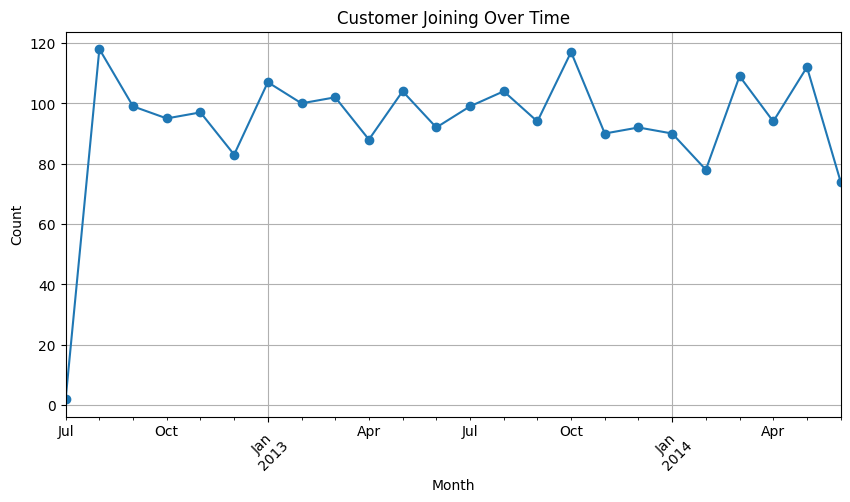

In [27]:
import matplotlib.pyplot as plt

# Group data by month and count occurrences
df_grouped = df.groupby(df['Dt_Customer'].dt.to_period("M")).size()

# Plot
plt.figure(figsize=(10,5))
df_grouped.plot(kind='line', marker='o')
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Customer Joining Over Time")
plt.xticks(rotation=45)
plt.grid()
plt.show()


## Handle missing data

### Identify missing data

To clean missing data, we must first identify where they exist.

✅ Check for Missing Values in the Entire DataFrame

In [26]:
# Check the total number of missing values per column
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [31]:
# Check the total number of missing values per column sorted by descending order
df.isnull().sum().sort_values(ascending=False)

,0
Income,24
Year_Birth,0
ID,0
Education,0
Marital_Status,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


📌 Interpretation:
This shows the number of missing values in each column. If a column has too many missing values, it may require special handling.

✅ Visualize Missing Data

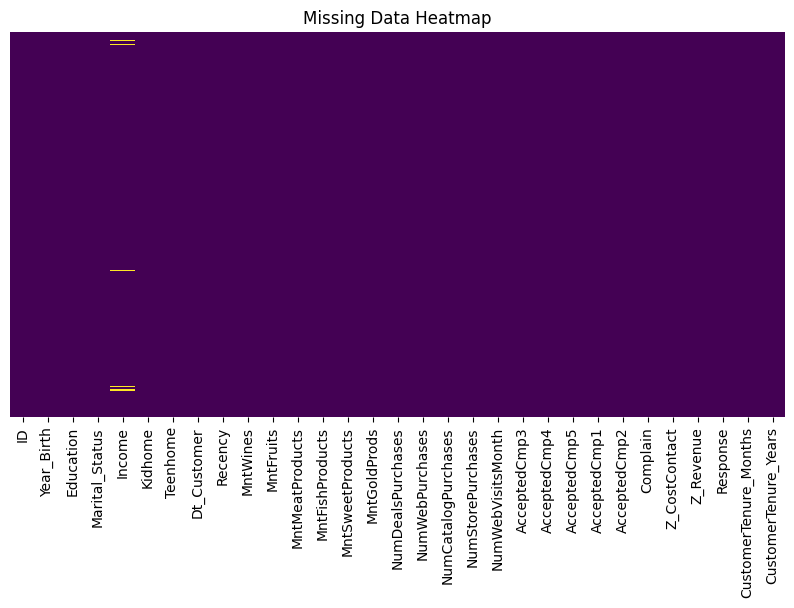

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot missing values as a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()


**📌 Interpretation:**  
The yellow lines indicate missing values. If a column has **many missing values**, we may need to drop or impute them.

✅ Display Missing Data

In [33]:
# Display the rows that contain missing values
df[df.isnull().any(axis=1)]


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,CustomerTenure_Months,CustomerTenure_Years
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,0,0,0,0,0,3,11,0,149,12.3
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,0,0,0,0,0,3,11,0,158,13.0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,...,0,0,0,0,0,3,11,0,149,12.3
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,0,0,0,0,0,3,11,0,147,12.1
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,0,0,0,0,0,3,11,0,154,12.7
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,0,0,0,0,0,3,11,0,163,13.4
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,0,0,0,0,0,3,11,0,161,13.2
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,0,0,0,0,0,3,11,0,142,11.7
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,0,0,0,0,0,3,11,0,148,12.2
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,0,0,0,0,0,3,11,0,153,12.6


### Handle missing data

#### Remove missing values


In [34]:
df.dropna()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,CustomerTenure_Months,CustomerTenure_Years
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,163,13.5
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,145,11.9
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,151,12.5
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,146,12.0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,146,12.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,3,11,0,154,12.7
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,1,0,0,3,11,0,142,11.7
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,1,0,0,0,0,3,11,0,146,12.1
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,3,11,0,146,12.1


#### Fill missing values with the column mean/median (for numerical data):

In [35]:
# Replace ["ColumnName"] with "your column"
# df["ColumnName"] = df["ColumnName"].fillna(df["ColumnName"].mean())
df["Income"] = df["Income"].fillna(df["Income"].median())

#### Fill missing values with the column mode (for categorical data):

```python
# Replace ["ColumnName"] with "your column"
df["ColumnName"] = df["ColumnName"].fillna(df["ColumnName"].mode())

In [ ]:
# Write your code here


## Handle duplicated data

### Identifying Duplicates

In [ ]:
# Check for duplicate rows
duplicates = df.duplicated()
df[duplicates]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2246,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
2247,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2248,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
2249,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0


In [ ]:
# Sumiing duplicated data
df.duplicated().sum()

np.int64(4)

**Summing by a Specific Column Combination**

Often, duplicates exist based on a subset of columns (e.g., summing sales by customer and product).



In [ ]:
# Create a DataFrame with some duplicates and some unique names
data = {
    'First Name': ['John', 'Jane', 'John', 'Alice', 'Jane', 'John', 'Alice', 'Mark', 'Sarah'],
    'Last Name': ['Doe', 'Smith', 'Doe', 'Brown', 'Smith', 'Doe', 'Green', 'Taylor', 'Lee'],
    'Age': [30, 25, 30, 40, 25, 35, 45, 50, 28]  # Extra column for variety
}

df_name = pd.DataFrame(data)

print('Original DF')
print(df_name)


# Define the columns to check for duplicates (First Name, Last Name)
cols_to_check = ['First Name', 'Last Name']

# Find duplicate rows based on the combination of first and last name
df_dupes = df_name[df_name.duplicated(subset=cols_to_check, keep=False)]
print('\nDuplicated DF')

print(df_dupes)

Original DF
  First Name Last Name  Age
0       John       Doe   30
1       Jane     Smith   25
2       John       Doe   30
3      Alice     Brown   40
4       Jane     Smith   25
5       John       Doe   35
6      Alice     Green   45
7       Mark    Taylor   50
8      Sarah       Lee   28

Duplicated DF
  First Name Last Name  Age
0       John       Doe   30
1       Jane     Smith   25
2       John       Doe   30
4       Jane     Smith   25
5       John       Doe   35


Are rows 0, 2, 5 really duplicated?

### Remove duplicates

In [36]:
df.drop_duplicates()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,CustomerTenure_Months,CustomerTenure_Years
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,163,13.5
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,145,11.9
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,151,12.5
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,146,12.0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,146,12.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,3,11,0,154,12.7
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,1,0,0,3,11,0,142,11.7
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,1,0,0,0,0,3,11,0,146,12.1
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,3,11,0,146,12.1


# Step 4: Transform Data

## Normalise data

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Sample dataset
data = {
    'Salary': [25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000, 1000000]  # Includes an extreme outlier
}
df_salary = pd.DataFrame(data)

# Apply Min-Max Scaling (0-1 scaling)
minmax_scaler = MinMaxScaler()
df_salary['Salary_MinMax'] = minmax_scaler.fit_transform(df_salary[['Salary']])

# Apply Z-score Standardisation (Mean = 0, Std = 1)
standard_scaler = StandardScaler()
df_salary['Salary_ZScore'] = standard_scaler.fit_transform(df_salary[['Salary']])

# Apply Robust Scaling (Median-centered, IQR-based scaling)
robust_scaler = RobustScaler()
df_salary['Salary_Robust'] = robust_scaler.fit_transform(df_salary[['Salary']])

# Display the results
print(df_salary)

    Salary  Salary_MinMax  Salary_ZScore  Salary_Robust
0    25000       0.000000      -0.655102          -1.00
1    50000       0.025641      -0.567103          -0.75
2    75000       0.051282      -0.479104          -0.50
3   100000       0.076923      -0.391106          -0.25
4   125000       0.102564      -0.303107           0.00
5   150000       0.128205      -0.215108           0.25
6   175000       0.153846      -0.127109           0.50
7   200000       0.179487      -0.039111           0.75
8  1000000       1.000000       2.776850           8.75


## Encode categorical variable

### Ordinal Encoding (For Ordinal Data i.e. Ordered Categories)

In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Sample dataset with ordinal categories
df_ordinal = pd.DataFrame({
    'Satisfaction': ['Low', 'Medium', 'High', 'Low', 'High'],
    'Membership': ['Bronze', 'Silver', 'Gold', 'Silver', 'Gold']
})

# Define the order for ordinal categories
category_orders = [
    ['Low', 'Medium', 'High'],   # Order for 'Satisfaction'
    ['Bronze', 'Silver', 'Gold'] # Order for 'Membership'
]

# Initialize and apply Ordinal Encoding
encoder = OrdinalEncoder(categories=category_orders)
df_ordinal[['Satisfaction_Encoded', 'Membership_Encoded']] = encoder.fit_transform(df_ordinal[['Satisfaction', 'Membership']])

print(df_ordinal)


  Satisfaction Membership  Satisfaction_Encoded  Membership_Encoded
0          Low     Bronze                   0.0                 0.0
1       Medium     Silver                   1.0                 1.0
2         High       Gold                   2.0                 2.0
3          Low     Silver                   0.0                 1.0
4         High       Gold                   2.0                 2.0


🔍 **Explanation**  
- **Low, Medium, High** are converted into **0, 1, 2** (in increasing order).  
- **Bronze, Silver, Gold** are converted into **0, 1, 2**.  
- This method is useful when **higher values indicate a stronger effect** (e.g., Satisfaction or Membership levels).  

---

### One-Hot Encoding (For Nominal Data i.e. Unordered Categories)

In [ ]:
# Sample dataset with nominal categories
df_nominal = pd.DataFrame({'City': ['New York', 'London', 'Tokyo', 'London', 'Tokyo']})

# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df_nominal, columns=['City'])

print(df_encoded)

   City_London  City_New York  City_Tokyo
0        False           True       False
1         True          False       False
2        False          False        True
3         True          False       False
4        False          False        True


**🔍 Explanation**
- `pd.get_dummies()` creates a **separate column** for each category.  
- If a row belongs to `"New York"`, the `City_New York` column gets **1**, and others remain **0**.  
- This method is useful when **categories are equally important and unordered**.  

---

**Avoiding the Dummy Variable Trap**

**Issue:** If we create `n` columns for `n` categories, they can be **redundant** because one column can be derived from the others.  
**Solution:** Drop one column using `drop_first=True` to avoid multicollinearity.

In [ ]:
df_one_hot_drop_first = pd.get_dummies(df_nominal, columns=['City'], drop_first=True)
print(df_one_hot_drop_first)

   City_New York  City_Tokyo
0           True       False
1          False       False
2          False        True
3          False       False
4          False        True


# Step 5: Save the Cleaned Data
After cleaning and preprocessing your dataset, you need to save it for further analysis. This ensures that your cleaned data is stored in a structured format, ready for machine learning, visualization, or reporting.

The most common format for storing structured data is **CSV (Comma-Separated Values)**. Use the `.to_csv()` function to save the cleaned DataFrame.


In [ ]:
# Save the cleaned dataset as a CSV file
df.to_csv("cleaned_data.csv", index=False)

🔍 **Explanation**  
- `"cleaned_data.csv"` → Specifies the filename.  
- `index=False` → Prevents pandas from saving the DataFrame index as a separate column.  

---

After saving, you can **reload your cleaned data** in future analyses:


In [ ]:
df = pd.read_csv("cleaned_data.csv")

# 🏠 Homework: Apply What You Learned!

1. **Load a different dataset** (e.g., assignment data).  
2. **Perform data inspection, cleaning, and transformation:**  
   - Identify missing values, incorrect data types, and duplicates.  
   - Handle missing data, encode categorical variables, and scale numerical features.  
3. **Save the cleaned dataset.**
4. **Answer the following questions:**  
   - **Were there any issues with the data?** (e.g., missing values, duplicates, outliers)  
   - **What data preprocessing steps did you apply?** (e.g., handling missing values, encoding, scaling)  